In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('html_docs_scrape.csv')


In [3]:
df['text_segmented'][1]

"[('text', 'Immigration Rules part 6A: the points-based system'), ('text', 'Points-based system (paragraphs 245AAA to 245ZZE).'), ('section', '245AAA.General requirements for indefinite leave to remain'), ('text', 'The following rules apply to all requirements for indefinite leave to remain in Part 6A and Appendix A:'), ('text', '\\n(a) References to a “continuous period” “lawfully in the UK” means, subject to paragraph (e), residence in the UK for an unbroken period with valid leave, and for these purposes a period shall be considered unbroken where:\\n    \\n(i)\\tthe applicant has not been absent from the UK for more than 180 days during any 12 month period in the continuous period, except that:\\n        \\n(1) any absence from the UK for the purpose of assisting with a national or international humanitarian or environmental crisis overseas shall not count towards the 180 days, if the applicant provides evidence that this was the purpose of the absence(s) and that their Sponsor, if

In [4]:
import re
r = re.compile(r"([@])(\w+)\b")

AllReferences=map(lambda x: r.findall(x), df['text_segmented'])

import itertools

AllUniqueReferencesCombined=set(list(itertools.chain.from_iterable(AllReferences)))

References=map(lambda x:x[0]+x[1], AllUniqueReferencesCombined)


file=open("References.txt", 'a')
for each in References:
    file.write(each+"\n")

file.close()

In [ ]:
import nltk

def GetVerbPhrases(s):
    try: 
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return[]
    else:
        grammar = "VP: {<VB.*>}"    # r"NP:{<DT><NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"
            
        cp = nltk.RegexpParser(grammar)
            
        noun_phrases_list = [[''.join(leaf[0] for leaf in tree.leaves())
                                 for tree in cp.parse(sent).subtrees()
                                 if tree.label()=='VP']
                                 for sent in sentences]
            
        return noun_phrases_list
    
    
import itertools


for title, sub in df.groupby('title'):
    verb_phrases=map(lambda x: GetVerbPhrases(x), sub['text_segmented'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases = set(list(itertools.chain.from_iterable(verb_phrases)))
    
    
    
    print( "Verb Phrases for "+ str(title).replace(':',''))
    
    for each in AllVerbPhrases:
        print(each+"\n")
    
    

In [41]:
for title, sub in df.groupby('title'):
    verb_phrases=map(lambda x: GetVerbPhrases(x), sub['text_segmented'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases = set(list(itertools.chain.from_iterable(verb_phrases)))


filename =  "Verb Phrases for " + str(title).replace(':','') + ".txt"
file = open(filename, 'a')
for each in AllVerbPhrases:
    file.write(each+"\n")
        
file.close()

In [42]:
pos_review_vp = open('Verb Phrases for Immigration Rules Appendix A: attributes.txt', 'r')
data = pos_review_vp.read().replace('\\n', '')

type(data)

str

In [43]:
import nltk
from nltk import word_tokenize

pos_review_vp_tokenized = list(map(str.lower, word_tokenize(data)))

In [44]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

pos_review_vp_lemmatized=[]
for word in pos_review_vp_tokenized:
    pos_review_vp_lemmatized.append(wnl.lemmatize(word))

In [45]:
pos_review_vp_lemmatized

['based',
 'lead',
 'became',
 'complied',
 'specifies',
 'commence',
 'done',
 'maintained',
 'state',
 'supply',
 'taken',
 'paying',
 'otherwise',
 'returning',
 'changing',
 'indicated',
 'recruited',
 'deemed',
 'conforms',
 'been',
 'exist',
 'advertises',
 'connected',
 'organised',
 'filing',
 'allocated',
 'created',
 'withdraw',
 'boarding',
 'have',
 'fall',
 'coming',
 'manages',
 'undertaking',
 'need',
 'excluded',
 'contracted',
 'reduced',
 'limit',
 'delivered',
 'rolling',
 "'attributes",
 'including',
 'carried',
 'owns',
 'follow',
 'printed',
 'linked',
 'study',
 'qualifying',
 'referred',
 'comply',
 'divorced',
 'company',
 'based',
 'paragraph',
 'is',
 '.',
 'setting',
 'work',
 'and',
 'self-employed',
 'withdrawn',
 'owned',
 'see',
 'apply',
 'allow',
 'considered',
 'rely',
 'prove',
 'include',
 'reclassification',
 'outlined',
 'assessed',
 'refused.82d',
 'listed',
 'involve',
 'adjusted',
 'combined',
 'employ',
 'shown',
 'entitled',
 'building',
 're

In [46]:
dic = {x: pos_review_vp_lemmatized.count(x) for x in pos_review_vp_lemmatized}

In [35]:
dic.keys()

dict_keys(['based', 'lead', 'became', 'complied', 'specifies', 'commence', 'done', 'maintained', 'state', 'supply', 'taken', 'paying', 'otherwise', 'returning', 'changing', 'indicated', 'recruited', 'deemed', 'conforms', 'been', 'exist', 'advertises', 'connected', 'organised', 'filing', 'allocated', 'created', 'withdraw', 'boarding', 'have', 'fall', 'coming', 'manages', 'undertaking', 'need', 'excluded', 'contracted', 'reduced', 'limit', 'delivered', 'rolling', "'attributes", 'including', 'carried', 'owns', 'follow', 'printed', 'linked', 'study', 'qualifying', 'referred', 'comply', 'divorced', 'company', 'paragraph', 'is', '.', 'setting', 'work', 'and', 'self-employed', 'withdrawn', 'owned', 'see', 'apply', 'allow', 'considered', 'rely', 'prove', 'include', 'reclassification', 'outlined', 'assessed', 'refused.82d', 'listed', 'involve', 'adjusted', 'combined', 'employ', 'shown', 'entitled', 'building', 'recognised', 'resulting', 'reporting', 'read', 'earning', 'determined', 'take', 'ear

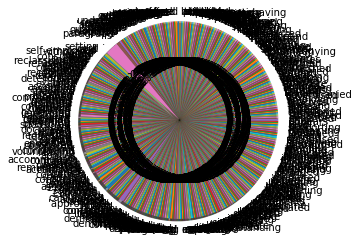

In [36]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = dic.keys()
sizes = dic.values()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [37]:
dic.values()

dict_values([2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 12, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,